# Lab 1&2: 
### TA : Hisham Ashraf Amer 

#### Lab_1_Date : 19/10/2020
#### Lab_2_Date: TBD

1. Build our first quantum circuits using Qiskit.

2. Introduce the Quantum information Module.

3. Building Multiqubit Operators to manipulate statevectors using the module.

4. Build a Bell state and visualize its measurement and elaborate on maximally entangled states.

5. Introduce the GHZ state, and build a quantum circuit for a 4-Qubit GHZ state and run it on IMB's quantum Computer Simulator.

6. Assess the Density matrices of GHZ states on Qiskit from an actual run on an IBM quantum computer, so we will see the effect of noise and decoherence on the density matrix of states resulting from real circuits.

7. Very quickly discuss the concept behind one very promising application of quantum computers, Variational Quantum Eigen-solvers, which we will build in a later lab session.

# 1.0 : Intro to Circuit construction, visualization and measurments:

### 1.1 : Building our fist circuit and identifying the statevector:

In [1]:
## importing the required packages

from qiskit import *
import numpy as np

In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

'''initializing the circuit with 2 qubits in the quantum register and 2 in 
the classical register and their quantum circuit'''

qr = QuantumRegister(2, 'q')
cr = ClassicalRegister(2, 'c')
circ = QuantumCircuit(qr, cr)

## add gates to the quantum circuit 

circ.x(qr[0])
circ.cx(qr[0], qr[1])
circ.measure(qr[0], cr[0])
circ.measure(qr[1], cr[1])

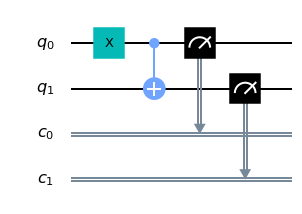

In [3]:
## printing out the circuit in the matplotlib format

circ.draw(output='mpl',cregbundle=False)

In [4]:
'''choose a simulator to work on, we will use the statevector backend from the Qiskit Aer package and save it 
in the S_simulator variable ''' 

S_simulator = Aer.get_backend('statevector_simulator')

## now to execute the circuit, using the execute function and after it runs we can store the results using "result" fucntion
rslt = execute(circ, backend = S_simulator).result()
## extract the statevector from all the different result options using the "get_statevector" function
My_statevector = rslt.get_statevector()

In [5]:
print(My_statevector)

[0.+0.j 0.+0.j 0.+0.j 1.+0.j]


In [6]:
## This is to emphasize the statevector is a numpy array

print(type(My_statevector))

<class 'numpy.ndarray'>


### 1.2 : Task .... Find a circuit that generates the singlet state:

In [7]:
##initializing the circuit with 2 qubits in the quantum register and 2 in the classical register

qr = QuantumRegister(2,'q0')
cr = ClassicalRegister(2,'c0')
circ = QuantumCircuit(qr,cr)

## specifying the gates needed for the singlet state
#first the x-gate on qubit 1 so that when we act on it with a hadamard later we get a negative
#infront of the |1> 

circ.x(qr[0])
circ.barrier()  ## barrier just for visual convenience 

## a hadamard gate on qubit 1 to put it in a superposition
circ.h(qr[0])
circ.barrier()

## a cnot gate with qubit 1 as control and qubit 2 as target
circ.cx(qr[0], qr[1])
circ.barrier()


circ.x(qr[1])
circ.barrier()

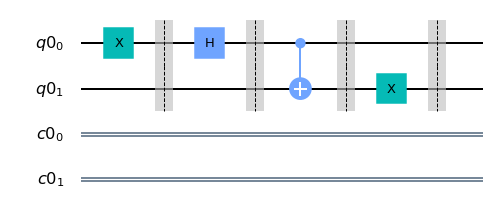

In [8]:
## printing out the circuit in the matplotlib format

circ.draw(output='mpl',cregbundle=False)

In [9]:
## adding measurements from qubit 1 and 2 to classical register bits c1 and c2  
circ.measure(qr,cr)

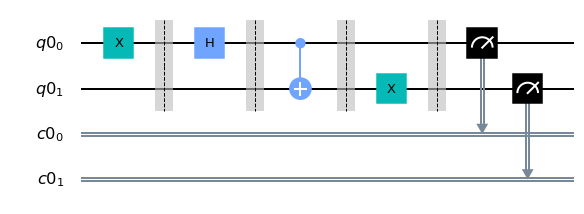

In [10]:
circ.draw(output='mpl',cregbundle=False)

### 1.3 : Qasm Simulator, measurements and counts:

In [11]:
## specifying the simulator, we will use the Qasm simulator form the Aer Qiskit package

sim = Aer.get_backend('qasm_simulator')

#############################################

In [12]:
## run the circuit 'circ' on the Qasm simulator 'sim' storing the results in the "rslt" object
rslt = execute(circ, backend = sim).result()

In [13]:
#for informative visualization of results we can use qiskit visualization tools but first need
# to import the required tool:

from qiskit.tools.visualization import plot_histogram

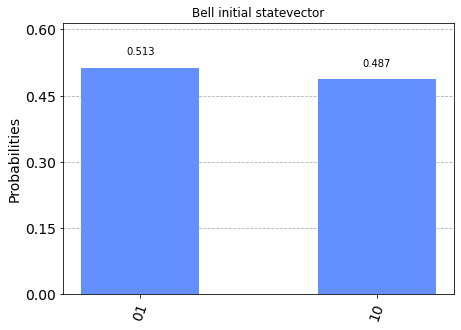

In [14]:
## plotting a histogram of the measurements made by the circuit

plot_histogram(rslt.get_counts(circ),title="Bell initial statevector")

In [15]:
## another circuit just to show how one can get the state vector resulting from the circuit
##(before measurments)


q = QuantumRegister(2,'q') 
c = ClassicalRegister(2,'c')
qc = QuantumCircuit(q, c)


## specifying the gates needed for the singlet state (same circuit as before)

qc.x(q[0])
qc.barrier()
qc.h(q[0])
qc.barrier()
qc.cx(q[0], q[1])
qc.barrier()
qc.x(q[1])


## this time we use the Statevector Simulator istead of Qasm, since we need the statevector

backend = Aer.get_backend('statevector_simulator')
result = qiskit.execute(qc, backend=backend).result()


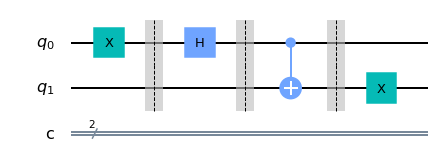

In [16]:

## obviosuly the same circuit but without the measurment step

qc.draw(output = 'mpl')

In [17]:
## the state vector results were stored in 'output' so we print them out we clearly see the
#amplitude of every basis state and it's 0 for the first and last basis vector and -1/sqrt 2 for 
#the |01> and +1/sqrt 2 for |01>  (remember Qiskit reverses order of qubits) which 
#corresponds to a singlet state.

rslt = execute(qc, backend = S_simulator).result()
## extract the statevector from all the different result options using the "get_statevector" function
My_statevector = rslt.get_statevector()
print(My_statevector)

[ 0.        +0.00000000e+00j -0.70710678+8.65956056e-17j
  0.70710678-8.65956056e-17j  0.        +0.00000000e+00j]


In [18]:
print(type(circ))
print(type(My_statevector))

<class 'qiskit.circuit.quantumcircuit.QuantumCircuit'>
<class 'numpy.ndarray'>


### 1.4 :  What if I want to visualize a bloch sphere of some single qubit state :


#### a. Using a quantum circuit to generate the state:

In [19]:
## import the plot bloch vector function from Qiksit 

from qiskit.tools.visualization import plot_bloch_multivector

# setup a circuit to generate a single qubiit state

circ = QuantumCircuit(1,1)
circ.x(0)
S_simulator = Aer.get_backend('statevector_simulator')
rslt = execute(circ, backend = S_simulator).result()
My_statevector = rslt.get_statevector()

print(My_statevector)


[0.+0.j 1.+0.j]


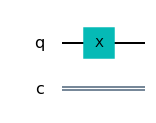

In [20]:
## this means that the X-gate appied on state |0> =|1>
circ.draw(output='mpl')

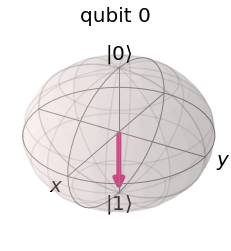

In [21]:
## given a statevector we can plot it on a bloch sphere
plot_bloch_multivector(My_statevector)


#### b. Using a random state generator:

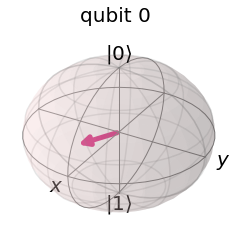

In [22]:
from qiskit.quantum_info import random_statevector
our_random_statevector =random_statevector(2, seed=None)
plot_bloch_multivector(our_random_statevector)


In [23]:
print(our_random_statevector)

Statevector([ 0.40616298+0.04122895j, -0.23646061-0.88171321j],
            dims=(2,))


#### c. Input your own single qubit state as an array:


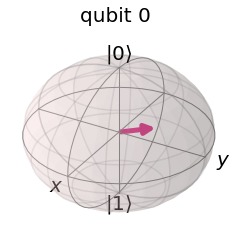

In [24]:
My_statevector_2 = np.array([0.5, -np.sqrt(3)/2])
plot_bloch_multivector(My_statevector_2)

### 1.5 : Task ...generate the state 'r' ie. y+ :

#### there are several ways for example:
#### a. We can just plugin the statevector since we are already familiar with it:

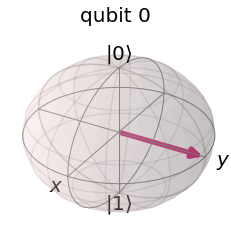

In [25]:
My_statevector_3 = np.array([0.707, 0.0+0.707j])
plot_bloch_multivector(My_statevector_3)

#### b. Use a circuit initialized to the '0' state, and rotate it around the x-axis by pi/2 :

In [26]:
# setup a circuit to generate a single qubiit state

circ = QuantumCircuit(1,1)
circ.rx(np.pi/2,0)
circ.rz(np.pi,0)

S_simulator = Aer.get_backend('statevector_simulator')
rslt = execute(circ, backend = S_simulator).result()
My_statevector = rslt.get_statevector()

print(My_statevector)


[7.07106781e-01+0.j         4.32978028e-17+0.70710678j]


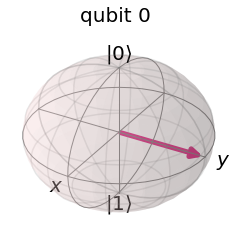

In [27]:
plot_bloch_multivector(My_statevector)

# 2.0 : Some functions from Qiskit's Quantum_info Package:

In [28]:
Pauli(label='II') ## won't work so what do we do ? .. import the required pachages !!!

NameError: name 'Pauli' is not defined

### 2.1 : Building operators :

### Initiating Pauli Strings ex: XX + ZZ + II

In [29]:
## import the required pauli matrices and operator packages from the quantum info module:

from qiskit.quantum_info.operators import Operator, Pauli
from qiskit.extensions import RXGate, XGate, CXGate, HGate, U2Gate, IGate

In [30]:
a= Pauli(label='II');

In [31]:
type(a)

qiskit.quantum_info.operators.pauli.Pauli

In [32]:
pauli_dict = {
"II" : Operator(Pauli(label='II')),
"XX" : Operator(Pauli(label='XX')),
"YY" : Operator(Pauli(label='YY')),
"ZZ" : Operator(Pauli(label='ZZ')),
"XI" : Operator(Pauli(label='XI')),
"IX" : Operator(Pauli(label='IX')),
"YI" : Operator(Pauli(label='YI')),
"IY" : Operator(Pauli(label='IY')),
"IZ" : Operator(Pauli(label='IZ')),
"ZI" : Operator(Pauli(label='ZI')),
"XZ" : Operator(Pauli(label='XZ')),
"ZX" : Operator(Pauli(label='ZX')),
"YZ" : Operator(Pauli(label='YZ')),
"ZY" : Operator(Pauli(label='ZY')),
"XY" : Operator(Pauli(label='XY')),
"YX" : Operator(Pauli(label='YX')),
}


In [33]:
pauli_dict['ZZ'].data

array([[ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j, -1.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j, -1.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j]])

In [34]:
My_puali_string = pauli_dict['ZZ']+pauli_dict['YX']+pauli_dict['II']
My_puali_string

Operator([[2.+0.j, 0.+0.j, 0.+0.j, 0.-1.j],
          [0.+0.j, 0.+0.j, 0.-1.j, 0.+0.j],
          [0.+0.j, 0.+1.j, 0.+0.j, 0.+0.j],
          [0.+1.j, 0.+0.j, 0.+0.j, 2.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))

In [35]:
from qiskit.aqua.algorithms import NumPyEigensolver
from qiskit.quantum_info import Statevector

In [36]:
print(Statevector.from_label('00').evolve(pauli_dict['ZZ']))
print(Statevector.from_label('01').evolve(pauli_dict['ZZ']))
print(Statevector.from_label('10').evolve(pauli_dict['ZZ']))
print(Statevector.from_label('11').evolve(pauli_dict['ZZ']))


Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))
Statevector([ 0.+0.j, -1.+0.j,  0.+0.j,  0.+0.j],
            dims=(2, 2))
Statevector([ 0.+0.j,  0.+0.j, -1.+0.j,  0.+0.j],
            dims=(2, 2))
Statevector([0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
            dims=(2, 2))


### Input your own NumPy array for the matrix of the operator

In [37]:
XX = Operator([[0, 0, 0, 1], [0, 0, 1, 0], [0, 1, 0, 0], [1, 0, 0, 0]])
XX

Operator([[0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))

### Translate a Gate into a matrix operator

In [38]:
from qiskit.extensions import RXGate, XGate, CXGate, RYGate, HGate

In [39]:
## this is a Hadamard gate

HG = Operator(HGate())
HG.data

array([[ 0.70710678+0.j,  0.70710678+0.j],
       [ 0.70710678+0.j, -0.70710678+0.j]])

In [40]:
## tensor product between 2 Hadamard gates using the expand function
HG.expand(HG)

Operator([[ 0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j],
          [ 0.5+0.j, -0.5+0.j,  0.5+0.j, -0.5+0.j],
          [ 0.5+0.j,  0.5+0.j, -0.5+0.j, -0.5+0.j],
          [ 0.5+0.j, -0.5+0.j, -0.5+0.j,  0.5-0.j]],
         input_dims=(2, 2), output_dims=(2, 2))

### 2.2 : Defining statevectors using Standard State Vector labels

In [41]:
Statevector.from_label('00') ## the 00 statvector obviosuly (1,0,0,0) since it's already one of the standard basis

Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))

In [42]:
## the X+ state
print(Statevector.from_label('+'))
## the X- state
print(Statevector.from_label('-'))
## the Y+ state
print(Statevector.from_label('r'))
## the Y- state
print(Statevector.from_label('l'))

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))
Statevector([ 0.70710678+0.j, -0.70710678+0.j],
            dims=(2,))
Statevector([0.70710678+0.j        , 0.        +0.70710678j],
            dims=(2,))
Statevector([0.70710678+0.j        , 0.        -0.70710678j],
            dims=(2,))


### 2.3.0: Density Matrices: 

The quantum info module also has a class just for density matrices, and offers MANY useful functions we will be using throughout the course and ones we have already studied in Lecture, for example getting the purity of a state given its density matrix.

In [43]:
from qiskit.quantum_info import DensityMatrix

#### 2.3.1 : Let's find the density matrix of a Singlet:

In [44]:
## we will input the state manually this time as a numpy array:

Singlet_statevector_array = np.array([0,-1/np.sqrt(2),1/np.sqrt(2),0]) 

In [45]:
## next we define a Statevector object for the Singlet using this array. Why? since the Statevector class provides many
## functions we can use, unlike the numpy.nd array class, which uses numpy specific functions

Singlet_statevector = Statevector(Singlet_statevector_array)
Singlet_statevector

Statevector([ 0.        +0.j, -0.70710678+0.j,  0.70710678+0.j,
              0.        +0.j],
            dims=(2, 2))

In [46]:
## now given the statvector we can call upon the "Density Matrix()" Functio, which takes a Statevector as input.
## Its output is a "Density matrix" class of object.

My_Singlet_density_matrix = DensityMatrix(Singlet_statevector)
My_Singlet_density_matrix

DensityMatrix([[ 0. +0.j,  0. -0.j,  0. +0.j,  0. +0.j],
               [ 0. +0.j,  0.5+0.j, -0.5+0.j,  0. +0.j],
               [ 0. +0.j, -0.5-0.j,  0.5+0.j,  0. +0.j],
               [ 0. +0.j,  0. -0.j,  0. +0.j,  0. +0.j]],
              dims=(2, 2))

#### what if we want toVisualize the density matrix, one way we can do that is through using a 3d Histogram :
we would need to import the "plot_state_city" function from qiskit's visualization package 

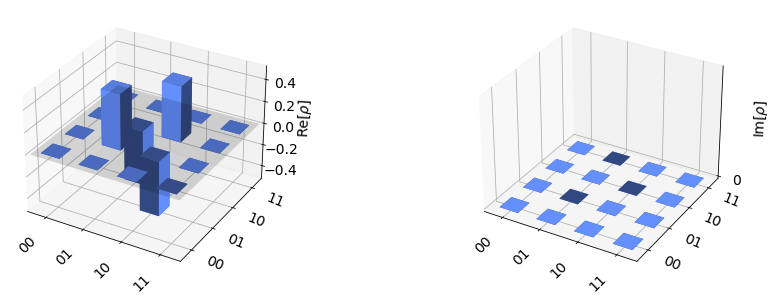

In [47]:
from qiskit.visualization import plot_state_city ## importing the function
plot_state_city(Singlet_statevector)

#### 2.3.2: Finding the Purity of a Singlet state: 

We can use the state vector or the density matrix:

In [48]:
## finding purity given the statevector
Singlet_statevector.purity()

0.9999999999999996

In [49]:
## finding purity given the density matrix:

In [50]:
My_Singlet_density_matrix.purity()

(0.9999999999999996+0j)

#### Obviously this shows that the Singlet state is a pure state since it has a purity of 1

#### 2.3.3: Finding reduced density matrices by tracing out subsystems: 

In [51]:
from qiskit.aqua.utils import get_subsystem_density_matrix

In [52]:
Singlet_reduced_density_matrix_array = get_subsystem_density_matrix(Singlet_statevector_array,[1])
Singlet_reduced_density_matrix_array

array([[0.5+0.j, 0. +0.j],
       [0. +0.j, 0.5+0.j]])

In [53]:
Singlet_reduced_density_matrix = DensityMatrix(Singlet_reduced_density_matrix_array)
Singlet_reduced_density_matrix

DensityMatrix([[0.5+0.j, 0. +0.j],
               [0. +0.j, 0.5+0.j]],
              dims=(2,))

In [54]:
Singlet_reduced_density_matrix.purity()

(0.4999999999999998+0j)

#### This shows that the reduced density matrix of The singlet is MAXIMALLY MIXED with a Purity = I/2

## 3. GHZ STATE

In [55]:
qr_1 = QuantumRegister(4, 'q')
cr_1 = ClassicalRegister(4, 'c')
circuit_1 = QuantumCircuit(qr_1, cr_1)

circuit_1.h(qr_1[0])
circuit_1.cx(qr_1[0], qr_1[1])
circuit_1.cx(qr_1[1], qr_1[2])
circuit_1.cx(qr_1[2], qr_1[3])
circuit_1.barrier()
circuit_1.measure(qr_1[0], cr_1[0])
circuit_1.measure(qr_1[1], cr_1[1])
circuit_1.measure(qr_1[2], cr_1[2])
circuit_1.measure(qr_1[3], cr_1[3])

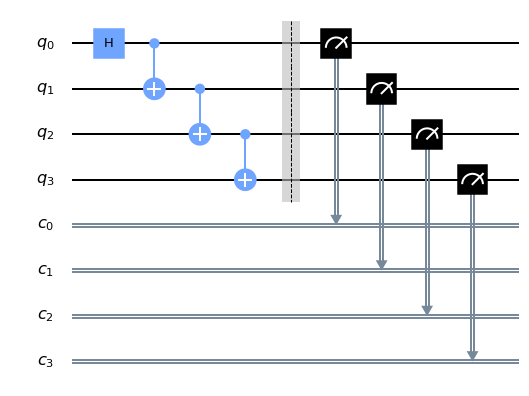

In [56]:
circuit_1.draw(output='mpl',cregbundle=False)

In [57]:
from qiskit.quantum_info import DensityMatrix

#### 2.3.1 : Let's find the density matrix of a 4-qubit GHZ state:

In [58]:
## first we input the state ourselves OR we could have designed a circuit to generate the state:

GHZ_statevector_array = np.array([1/np.sqrt(2),0,0,0,0,0,0,0,0,0,0,0,0,0,0,1/np.sqrt(2)])

In [59]:
GHZ_statevector = Statevector(GHZ_statevector_array)
GHZ_statevector

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2, 2, 2))

In [60]:
My_GHZ_density_matrix = DensityMatrix(GHZ_statevector)
My_GHZ_density_matrix

DensityMatrix([[0.5+0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j,
                0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j,
                0. +0.j, 0. +0.j, 0. +0.j, 0.5+0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j,
                0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j,
                0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j,
                0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j,
                0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j,
                0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j,
                0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j,
                0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j,
                0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
               [0. +0.j, 0. +0.j, 0

In [61]:
type(My_GHZ_density_matrix)

qiskit.quantum_info.states.densitymatrix.DensityMatrix

#### Since the matrices are getting larger and larger, and it might be difficult to read elements off the standard numpy array output, let's introduce a new package, "Sympy", a  Python library for symbolic mathematics. We will use simpy to print a nice latex-like visual of the matrix instead:

In [62]:
## NB: makse sure you have Sympy installed on your virtual environment on your local machine, or install it using google colab:

from sympy import Matrix, init_printing ## it's always nice to have the matrix function and init_printing functions

Remember, the density matrix is a special class only identified by Qiskit, so to extract the array data from it we need to call on the data attribute by specifying the command ".data" after the density matrix class object

In [63]:
## This is to show that the type of object we get after we specify the ".data", 
## it will be a numpy array hence the "numpy.ndarray"

type(My_GHZ_density_matrix.data)

numpy.ndarray

Now that the Sympy "Matrix()" function is defined, we can use it by providing the function with any numpy array as an argument:

In [64]:
Matrix(My_GHZ_density_matrix.data)

Matrix([
[0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5],
[  0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,   0],
[  0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,   0],
[  0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,   0],
[  0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,   0],
[  0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,   0],
[  0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,   0],
[  0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,   0],
[  0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,   0],
[  0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,   0],
[  0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,   0],
[  0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,   0],
[  0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,   0],
[  0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,   0],
[  0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,   0],
[0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5]])

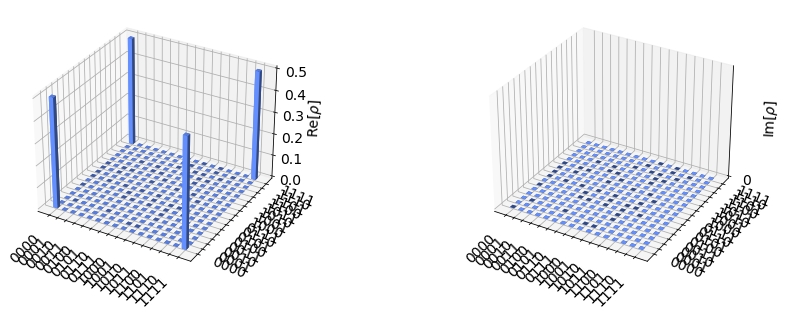

In [65]:

from qiskit.visualization import plot_state_city
plot_state_city(GHZ_statevector)

#### 2.3.2: Finding the Purity of a Singlet state: 

We can use the state vector or the density matrix:

In [66]:
## finding purity given the statevector
GHZ_statevector.purity()

0.9999999999999996

In [67]:
## finding purity given the density matrix:

In [68]:
My_GHZ_density_matrix.purity()

(0.9999999999999996+0j)

#### Obviously this shows that the GHZ state is a pure state since it has a purity of 1

#### 2.3.3: Finding reduced density matrices by tracing out the first of the 4 qubits: 

NB: Here we can have several subsets for our 2 systems, since we have a total of 4 individual subsystems representing our 4 unique Qubits, so first we will trace out the 1st qubit, leaving behind qubit 2,3 and 4:

In [69]:
GHZ_reduced_density_matrix_array = get_subsystem_density_matrix(GHZ_statevector_array,[0])
## the 0 here in the argument indicated that we were tracing out the 1st qubit, owing to the fact that we index starting from 0.
Matrix(GHZ_reduced_density_matrix_array)

Matrix([
[0.5, 0, 0, 0, 0, 0, 0,   0],
[  0, 0, 0, 0, 0, 0, 0,   0],
[  0, 0, 0, 0, 0, 0, 0,   0],
[  0, 0, 0, 0, 0, 0, 0,   0],
[  0, 0, 0, 0, 0, 0, 0,   0],
[  0, 0, 0, 0, 0, 0, 0,   0],
[  0, 0, 0, 0, 0, 0, 0,   0],
[  0, 0, 0, 0, 0, 0, 0, 0.5]])

In [70]:
'''we now need to apply the Purity function from the quantum info package, so we must apply it on a "Density matrix class"
Since we currently have a numpy array, we will input the array as an argument for the "Density matrix" function to translate
it into an object with of the Density matrix custom class type'''

GHZ_reduced_density_matrix = DensityMatrix(GHZ_reduced_density_matrix_array)
GHZ_reduced_density_matrix

DensityMatrix([[0.5+0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j,
                0. +0.j, 0. +0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j,
                0. +0.j, 0. +0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j,
                0. +0.j, 0. +0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j,
                0. +0.j, 0. +0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j,
                0. +0.j, 0. +0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j,
                0. +0.j, 0. +0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j,
                0. +0.j, 0. +0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j,
                0. +0.j, 0.5+0.j]],
              dims=(2, 2, 2))

In [71]:
GHZ_reduced_density_matrix.purity()

(0.4999999999999998+0j)

#### 2.3.4 : The reduced density matrix of the other subsystem, comprised of the 1st qubit.

To get the reduced density matrix of the 1st qubit as a sunsystem, we would need to trace ot the 2nd 3rd and 4th qubits, in contrast to what we did above with tracing out the first:

In [72]:
GHZ_reduced_density_matrix_array_2 = get_subsystem_density_matrix(GHZ_statevector_array,[1,2,3])
## the 1,2,3 here in the argument indicated that we were tracing out the 2nd 3rd and 4th qubit.
Matrix(GHZ_reduced_density_matrix_array_2)

Matrix([
[0.5,   0],
[  0, 0.5]])

In [73]:
GHZ_reduced_density_matrix_2 = DensityMatrix(GHZ_reduced_density_matrix_array_2)
GHZ_reduced_density_matrix_2

DensityMatrix([[0.5+0.j, 0. +0.j],
               [0. +0.j, 0.5+0.j]],
              dims=(2,))

In [74]:
GHZ_reduced_density_matrix_2.purity()

(0.4999999999999998+0j)

Note that it doesn't matter which subsystem we to extract information about the entanglement between the two subsystems of a bipartite system. In our case, subsystem A was the 1st qubit and system B the 2nd 3rd and 4th, we get the same purity, and both density matrices have the same non zero eigenvalues. 0.5 and 0.5 although they are of very different sizes.